<a href="https://colab.research.google.com/github/shreyas074/BONE-FRACTURE-DETECTION/blob/main/IMAGE_CLASSIFICATION_IN_HEALTHCARE_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

LOADING DATASET

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d vuppalaadithyasairam/bone-fracture-detection-using-xrays

 98% 169M/172M [00:06<00:00, 31.4MB/s]
100% 172M/172M [00:06<00:00, 28.1MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/bone-fracture-detection-using-xrays.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

GENERATORS

In [ ]:

train_ds=keras.utils.image_dataset_from_directory(
    directory ='/content/archive /train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/archive /val',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)


CREATING CNN MODEL

In [ ]:


model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Additional Convolutional Layers
model.add(Conv2D(10, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(20, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(40, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(Conv2D(80, kernel_size=(3, 3), padding='valid', activation='relu'))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

TRAINING THE MODEL

In [ ]:
history=model.fit(train_ds,epochs=9,validation_data=validation_ds)

Epoch 1/9
277/277 [==============================] - 43s 110ms/step - loss: 0.6259 - accuracy: 0.6245 - val_loss: 0.7123 - val_accuracy: 0.6333
Epoch 2/9
277/277 [==============================] - 27s 97ms/step - loss: 0.4301 - accuracy: 0.7829 - val_loss: 0.9509 - val_accuracy: 0.6633
Epoch 3/9
277/277 [==============================] - 27s 97ms/step - loss: 0.2114 - accuracy: 0.9106 - val_loss: 0.6197 - val_accuracy: 0.7983
Epoch 4/9
277/277 [==============================] - 28s 98ms/step - loss: 0.1002 - accuracy: 0.9613 - val_loss: 1.5071 - val_accuracy: 0.6500
Epoch 5/9
277/277 [==============================] - 28s 102ms/step - loss: 0.0758 - accuracy: 0.9731 - val_loss: 0.8875 - val_accuracy: 0.7667
Epoch 6/9
277/277 [==============================] - 28s 100ms/step - loss: 0.0579 - accuracy: 0.9807 - val_loss: 0.8276 - val_accuracy: 0.7933
Epoch 7/9
277/277 [==============================] - 27s 96ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 1.2199 - val_accuracy: 0.7

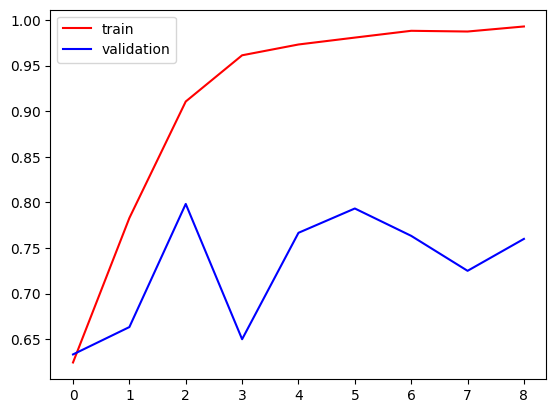

In [ ]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


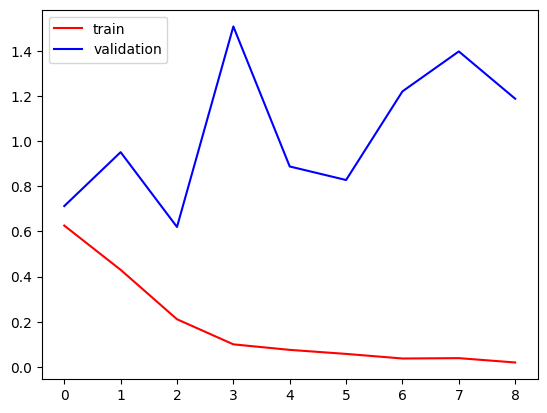

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
evaluation = model.evaluate(validation_ds)
print("Evaluation results:", evaluation)
accuracy = evaluation[1]
print("Accuracy:", accuracy)


19/19 [==============================] - 1s 40ms/step - loss: 1.1874 - accuracy: 0.7600
Evaluation results: [1.1873853206634521, 0.7599999904632568]
Accuracy: 0.7599999904632568


TESTING THE MODEL

Test Case 1:

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/FRACTURED2.jpg')

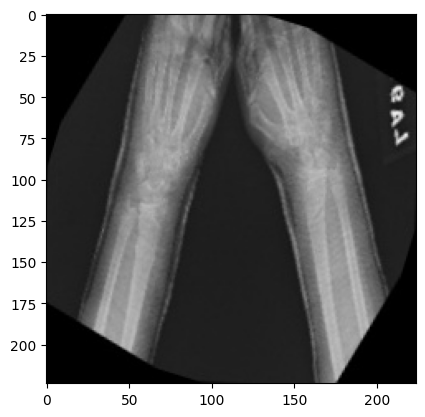

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(224, 224, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
prediction_result = model.predict(test_input)

threshold = 0.5

if prediction_result > threshold:
    print('fractured')
else:
    print('not fractured')

1/1 [==============================] - 0s 81ms/step
fractured


TEST CASE 2:

In [ ]:
test_img2=cv2.imread('/content/notfractured.jpg')

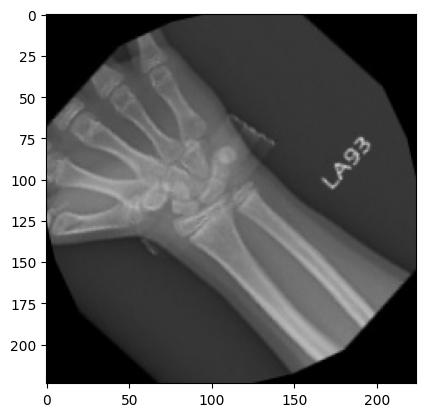

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2=cv2.resize(test_img2,(256,256))

In [ ]:
test_input2=test_img2.reshape((1,256,256,3))

In [ ]:
prediction_result = model.predict(test_input2)

threshold = 0.5

if prediction_result > threshold:
    print('fractured')
else:
    print('not fractured')

1/1 [==============================] - 0s 317ms/step
not fractured
